In [1]:
import pandas as pd
import statistics
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import statistics as stat
from scipy.stats import binom
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Rectangle
# splitting merge_data into train test and split
from sklearn.model_selection import train_test_split, cross_validate
from scipy import stats
from scipy.stats import normaltest
import os 
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import matplotlib as mpl
import warnings; warnings.filterwarnings(action='once')
# to keep track of training time
import datetime
# logistic regression model
from sklearn.linear_model import LogisticRegression
# metrics used for evaluation
from sklearn.metrics import f1_score, matthews_corrcoef
# visualizations
from yellowbrick.classifier import ClassPredictionError, ConfusionMatrix
from sklearn.metrics import plot_roc_curve
# KNN imputation
from sklearn.impute import KNNImputer
# normalizer
from sklearn.preprocessing import Normalizer
# variance threshold
from sklearn.feature_selection import VarianceThreshold
# RFECV
from sklearn.model_selection import StratifiedKFold
# random forest
from sklearn.ensemble import RandomForestClassifier
# evaluation metric
from sklearn.metrics import matthews_corrcoef, make_scorer
from scipy import stats 
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split 
from sklearn.model_selection import cross_val_score # Evaluate a score by cross-validation
from sklearn.model_selection import GridSearchCV # Exhaustive search over specified parameter values for an estimator
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics
from sklearn.metrics import accuracy_score # Accuracy classification score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # to show confusion matrix
from sklearn import metrics # Evaluate ROC curve
from sklearn.experimental import enable_iterative_imputer # Enables IterativeImputer. The API and results of this estimator might change without any deprecation cycle
from sklearn.impute import IterativeImputer
from imblearn.combine import SMOTEENN # Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours
from sklearn import decomposition
from boruta import BorutaPy
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from yellowbrick.model_selection import RFECV
from sklearn.svm import SVC

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



Read files 

In [2]:
def read_features():
    path ='C:/Users/duygu/OneDrive/Documents/VS_CODE_REPOS/Fault-Detection-SECOM/secom.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['feature_'+str(x+1) for x in range(len(df.columns))]
    return df

#%%
def read_target():
    path = 'C:/Users/duygu/OneDrive/Documents/VS_CODE_REPOS/Fault-Detection-SECOM/secom_labels.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['status','timestamp']
    df['timestamp'] = pd.to_datetime(df['timestamp'],dayfirst=True)
    return df

#read 2 df 
x = read_features()
y = read_target().iloc[:,0]

# Data Preparation

## Merge data

In [3]:
#df= pd.concat([df_features,df_target],axis=1)

## Split Training and test data 

In [4]:
x = read_features()
y = read_target().iloc[:,0]

result = []
i = 0

#step 1:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify=y)

In [5]:
x_train.isna().sum().sum()

33219

In [6]:
result = []
i = 0

In [7]:
#find the duplicated features (columns)
def remove_duplicated_columns(df):
    dict_duplicate_pair = {}
    dict_duplicate_matches = {}
    list_duplicate = []
    to_remove = []
    for i in range(0, len(df.columns)):
        l = []
        for j in range(i+1,len(df.columns)):
            dict_duplicate_pair[str(i+1)+';'+str(j+1)] = df.iloc[:,i].equals(df.iloc[:,j])
            if df.iloc[:,i].equals(df.iloc[:,j]) == True:
                if j not in list_duplicate:
                    l.append(j)
                    to_remove.append('feature_'+str(j+1))
                list_duplicate.append(i)
                list_duplicate.append(j)
        if len(l)!=0:
            dict_duplicate_matches[i] = l


    df_duplicate_pair = pd.DataFrame.from_dict(dict_duplicate_pair, orient='index')
    df_duplicate_pair.columns=['duplicate']

    df_duplicate_matches = pd.DataFrame.from_dict(dict_duplicate_matches, orient='index')

    
    df = df.drop(columns=to_remove, axis = 1)

    return df

x = remove_duplicated_columns(x)
x.shape

(1567, 486)

In [8]:
x_train = remove_duplicated_columns(x_train)

In [9]:
x_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
443,3079.77,2354.51,2207.0444,1269.6078,1.7571,100.0,97.0189,0.1221,1.4607,0.0155,...,0.0059,68.7444,0.5001,0.0110,0.0034,2.1899,0.0282,0.0194,0.0059,68.7444
760,3001.36,2491.23,2155.3111,918.2161,1.2753,100.0,105.0478,0.1227,1.4206,-0.0052,...,NaN,NaN,0.4943,0.0199,0.0042,4.0318,0.0169,0.0276,0.0081,163.9998
479,3042.78,2377.89,2173.4556,1433.6732,1.0304,100.0,110.5422,0.1245,1.4964,0.0204,...,NaN,NaN,0.4962,0.0114,0.0034,2.2877,0.0208,0.0287,0.0091,138.2861
362,3018.64,2401.80,2224.0000,1510.0797,1.5611,100.0,99.8300,0.1199,1.4428,-0.0110,...,0.0038,49.7490,0.5047,0.0101,0.0031,1.9927,0.0284,0.0141,0.0038,49.7490
662,3020.29,2433.99,2217.8111,1744.7771,0.9618,100.0,100.1789,0.1218,1.4950,-0.0097,...,NaN,NaN,0.5010,0.0147,0.0036,2.9338,0.0165,0.0114,0.0043,68.9871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,3057.31,2481.53,2214.9333,1663.7024,1.0203,100.0,100.4456,0.1247,1.4830,-0.0328,...,NaN,NaN,0.5037,0.0175,0.0039,3.4736,0.0263,0.0117,0.0033,44.3686
821,3009.71,2565.53,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.4440,-0.0079,...,NaN,NaN,0.4979,0.0078,0.0024,1.5724,0.0275,0.0215,0.0076,78.1199
213,3034.34,2631.47,2179.0445,2028.2208,1.5552,100.0,95.4256,0.1234,1.4281,0.0049,...,NaN,NaN,0.4968,0.0128,0.0035,2.5829,0.0298,0.0116,0.0039,38.9781
1556,3025.21,2503.30,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3687,-0.0070,...,0.0016,46.1076,0.5019,0.0158,0.0043,3.1428,0.0120,0.0055,0.0016,46.1076


## reducing dimensionality 

### remove missing values 

In [10]:
def null_values(df):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

In [11]:
x_train_na = null_values(x_train)
x_train_na

,Missing_Records,Percentage (%)
feature_158,1144,91.300878
feature_294,1144,91.300878
feature_293,1144,91.300878
feature_159,1144,91.300878
feature_493,1072,85.554669
...,...,...
feature_367,1,0.079808
feature_366,1,0.079808
feature_145,1,0.079808
feature_146,1,0.079808


In [12]:
miss_threshold=80
x_train_na= x_train_na[x_train_na["Percentage (%)"] > miss_threshold]
x_train_na

,Missing_Records,Percentage (%)
feature_158,1144,91.300878
feature_294,1144,91.300878
feature_293,1144,91.300878
feature_159,1144,91.300878
feature_493,1072,85.554669
feature_359,1072,85.554669
feature_86,1072,85.554669
feature_221,1072,85.554669


In [13]:
x_train_new = x_train.drop(axis=1, columns=x_train_na.index)
x_train_new.shape

(1253, 478)

### removing constant voltality

In [14]:
x_train_new_eda= x_train_new.describe().T
x_train_new_eda

,count,mean,std,min,25%,50%,75%,max
feature_1,1248.0,3014.113686,73.877303,2743.2400,2966.2300,3011.40500,3056.310000,3356.3500
feature_2,1247.0,2496.400585,79.188651,2162.8700,2452.3350,2500.38000,2539.600000,2846.4400
feature_3,1243.0,2200.216525,29.939025,2060.6600,2180.8611,2200.98890,2218.055500,2315.2667
feature_4,1243.0,1394.907987,436.632421,0.0000,1083.8858,1283.43680,1593.122000,3715.0417
feature_5,1243.0,4.018582,54.572445,0.6815,1.0160,1.31710,1.525700,1114.5366
...,...,...,...,...,...,...,...,...
feature_586,1252.0,3.084501,3.968128,1.1975,2.3058,2.74655,3.258475,99.3032
feature_587,1252.0,0.021521,0.012421,-0.0060,0.0134,0.02070,0.027600,0.1028
feature_588,1252.0,0.016344,0.008698,0.0042,0.0106,0.01480,0.019800,0.0799
feature_589,1252.0,0.005248,0.002850,0.0012,0.0033,0.00460,0.006300,0.0286


In [15]:
x_train_new_eda[x_train_new_eda['std']==0]
x_train_new_std= x_train_new_eda[x_train_new_eda["std"] == 0]
x_train_new_std

,count,mean,std,min,25%,50%,75%,max
feature_6,1243.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
feature_14,1251.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_43,1253.0,70.0,0.0,70.0,70.0,70.0,70.0,70.0
feature_50,1253.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
feature_53,1253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_70,1248.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
feature_98,1249.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_142,1243.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_179,1234.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_191,1250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
x_train_new_2 = x_train_new.drop(axis=1, columns=x_train_new_std.index)
x_train_new_2.shape

(1253, 466)

## Outlier Treatment

In [17]:
x_train_3s=x_train_new_2.copy()

In [18]:
def zscore(df,cols,thr):
    for col in cols:
        mean=df[col].mean()
        std=df[col].std()
        upper_bound=mean+ thr*std
        lower_bound=mean- thr*std
        df[col]=np.where(df[col]>upper_bound,upper_bound,np.where(df[col]<lower_bound,lower_bound,df[col]))

In [19]:
zscore(x_train_3s,x_train_3s.columns,3)

## Imputation

### KNN Imputation

In [20]:
#scaling before distanced based algo
scaler = MinMaxScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train_3s), columns=x_train_3s.columns)
x_train_scaled

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
0,0.648120,0.201366,0.538010,0.452172,0.006439,0.392017,0.787343,0.527160,0.680406,0.663699,...,0.345437,0.190010,0.514663,0.075172,0.110693,0.071958,0.527907,0.397495,0.373085,0.182951
1,0.471228,0.489118,0.250017,0.318042,0.003555,0.606695,0.806973,0.430272,0.451391,0.514345,...,NaN,NaN,0.224461,0.208979,0.166039,0.205512,0.353482,0.611932,0.547721,0.436456
2,0.564671,0.250573,0.351025,0.514797,0.002089,0.753605,0.865862,0.613416,0.734617,0.735677,...,NaN,NaN,0.319527,0.081186,0.110693,0.079049,0.413682,0.640698,0.627101,0.368023
3,0.510211,0.300896,0.632400,0.543962,0.005265,0.467181,0.715366,0.483910,0.387223,0.678095,...,0.191093,0.137507,0.744823,0.061641,0.089938,0.057659,0.530994,0.258894,0.206388,0.132398
4,0.513934,0.368646,0.597947,0.633548,0.001678,0.476510,0.777528,0.610033,0.401606,0.399181,...,NaN,NaN,0.559694,0.130800,0.124529,0.125897,0.347307,0.188287,0.246077,0.183597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,0.597451,0.468702,0.581926,0.602601,0.002028,0.483641,0.872406,0.581040,0.146039,0.582724,...,NaN,NaN,0.694788,0.172896,0.145284,0.165038,0.498579,0.196132,0.166698,0.118079
1249,0.490065,0.645495,0.636173,0.467074,0.004245,0.502029,0.744811,0.486810,0.421520,0.359593,...,NaN,NaN,0.404586,0.027062,0.041510,0.027184,0.517102,0.452412,0.508031,0.207902
1250,0.545630,0.784278,0.382138,0.741741,0.005230,0.349415,0.829874,0.448393,0.563133,0.661900,...,NaN,NaN,0.349548,0.102234,0.117611,0.100454,0.552604,0.193517,0.214325,0.103733
1251,0.525033,0.514521,0.385973,1.000000,0.004806,0.000000,0.875677,0.304874,0.431477,0.436969,...,0.029399,0.127442,0.604725,0.147337,0.172957,0.141052,0.277846,0.033996,0.031752,0.122707


In [21]:
# impute missing values and save it as a temporary dataset.
# no need to use scalr before applying teh KNN model , fit_transform fits and scales automatically
#use fit_transform on training data and only transform on test data
knn = KNNImputer(weights='distance')
#knn.fit(x_train_scaled)
#imputed_train = pd.DataFrame(knn.fit_transform(x_train_3s), columns = x_train_3s.columns)
imputed_train = pd.DataFrame(knn.fit_transform(x_train_scaled), columns = x_train_scaled.columns)

In [22]:
imputed_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
0,0.648120,0.201366,0.538010,0.452172,0.006439,0.392017,0.787343,0.527160,0.680406,0.663699,...,0.345437,0.190010,0.514663,0.075172,0.110693,0.071958,0.527907,0.397495,0.373085,0.182951
1,0.471228,0.489118,0.250017,0.318042,0.003555,0.606695,0.806973,0.430272,0.451391,0.514345,...,0.419934,0.229978,0.224461,0.208979,0.166039,0.205512,0.353482,0.611932,0.547721,0.436456
2,0.564671,0.250573,0.351025,0.514797,0.002089,0.753605,0.865862,0.613416,0.734617,0.735677,...,0.277680,0.172202,0.319527,0.081186,0.110693,0.079049,0.413682,0.640698,0.627101,0.368023
3,0.510211,0.300896,0.632400,0.543962,0.005265,0.467181,0.715366,0.483910,0.387223,0.678095,...,0.191093,0.137507,0.744823,0.061641,0.089938,0.057659,0.530994,0.258894,0.206388,0.132398
4,0.513934,0.368646,0.597947,0.633548,0.001678,0.476510,0.777528,0.610033,0.401606,0.399181,...,0.237025,0.337292,0.559694,0.130800,0.124529,0.125897,0.347307,0.188287,0.246077,0.183597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,0.597451,0.468702,0.581926,0.602601,0.002028,0.483641,0.872406,0.581040,0.146039,0.582724,...,0.213805,0.129369,0.694788,0.172896,0.145284,0.165038,0.498579,0.196132,0.166698,0.118079
1249,0.490065,0.645495,0.636173,0.467074,0.004245,0.502029,0.744811,0.486810,0.421520,0.359593,...,0.250725,0.155534,0.404586,0.027062,0.041510,0.027184,0.517102,0.452412,0.508031,0.207902
1250,0.545630,0.784278,0.382138,0.741741,0.005230,0.349415,0.829874,0.448393,0.563133,0.661900,...,0.319653,0.106344,0.349548,0.102234,0.117611,0.100454,0.552604,0.193517,0.214325,0.103733
1251,0.525033,0.514521,0.385973,1.000000,0.004806,0.000000,0.875677,0.304874,0.431477,0.436969,...,0.029399,0.127442,0.604725,0.147337,0.172957,0.141052,0.277846,0.033996,0.031752,0.122707


In [23]:
retransformed_train= pd.DataFrame(scaler.inverse_transform(imputed_train), columns=imputed_train.columns)

In [24]:
retransformed_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
0,3079.77,2354.51,2207.0444,1269.607800,1.7571,97.018900,0.1221,1.4607,0.0155,0.0093,...,0.005900,68.744400,0.5001,0.0110,0.0034,2.1899,0.0282,0.0194,0.0059,68.7444
1,3001.36,2491.23,2155.3111,918.216100,1.2753,105.047800,0.1227,1.4206,-0.0052,0.0010,...,0.006914,83.204329,0.4943,0.0199,0.0042,4.0318,0.0169,0.0276,0.0081,163.9998
2,3042.78,2377.89,2173.4556,1433.673200,1.0304,110.542200,0.1245,1.4964,0.0204,0.0133,...,0.004978,62.301563,0.4962,0.0114,0.0034,2.2877,0.0208,0.0287,0.0091,138.2861
3,3018.64,2401.80,2224.0000,1510.079700,1.5611,99.830000,0.1199,1.4428,-0.0110,0.0101,...,0.003800,49.749000,0.5047,0.0101,0.0031,1.9927,0.0284,0.0141,0.0038,49.7490
4,3020.29,2433.99,2217.8111,1744.777100,0.9618,100.178900,0.1218,1.4950,-0.0097,-0.0054,...,0.004425,122.030067,0.5010,0.0147,0.0036,2.9338,0.0165,0.0114,0.0043,68.9871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,3057.31,2481.53,2214.9333,1663.702400,1.0203,100.445600,0.1247,1.4830,-0.0328,0.0048,...,0.004109,46.804881,0.5037,0.0175,0.0039,3.4736,0.0263,0.0117,0.0033,44.3686
1249,3009.71,2565.53,2224.6778,1308.647900,1.3907,101.133300,0.1208,1.4440,-0.0079,-0.0076,...,0.004611,56.271160,0.4979,0.0078,0.0024,1.5724,0.0275,0.0215,0.0076,78.1199
1250,3034.34,2631.47,2179.0445,2028.220800,1.5552,95.425600,0.1234,1.4281,0.0049,0.0092,...,0.005549,38.474542,0.4968,0.0128,0.0035,2.5829,0.0298,0.0116,0.0039,38.9781
1251,3025.21,2503.30,2179.7333,2704.805249,1.4843,82.357569,0.1248,1.3687,-0.0070,-0.0033,...,0.001600,46.107600,0.5019,0.0158,0.0043,3.1428,0.0120,0.0055,0.0016,46.1076


## Feature Selection

In [25]:
#NOTE: no need to retransform /unscale
#retransformed_train= pd.DataFrame(scaler.inverse_transform(imputed_train), columns=imputed_train.columns)

Boruta Shap with Random forest 

In [26]:
from BorutaShap import BorutaShap

In [27]:
#Boruta Shap function with random forest

def BorutaShapFeatureSelection (X, y) :
    feature_names = np.array(X.columns)

    # define random forest classifier
    modelshap = RandomForestClassifier(n_jobs=-1,n_estimators=100, max_depth=5, random_state=100)
    modelshap.fit(X,y)
    
    # define Boruta feature selection method
    feature_selector = BorutaShap(model=modelshap,
                              importance_measure='shap',
                              classification=True)

    # find all relevant features
    feature_selector.fit(X,y,n_trials=100,sample = False, verbose = True,random_state=100)
    feature_selector.plot(which_features='accepted',figsize=(20,10))
 # call transform() on X to filter it down to selected features
    return  feature_selector.Subset()


100%|██████████| 100/100 [00:41<00:00,  2.43it/s]


18 attributes confirmed important: ['feature_342', 'feature_349', 'feature_22', 'feature_283', 'feature_299', 'feature_65', 'feature_435', 'feature_164', 'feature_332', 'feature_133', 'feature_60', 'feature_34', 'feature_124', 'feature_206', 'feature_442', 'feature_478', 'feature_66', 'feature_461']
447 attributes confirmed unimportant: ['feature_52', 'feature_64', 'feature_276', 'feature_437', 'feature_542', 'feature_471', 'feature_25', 'feature_108', 'feature_105', 'feature_109', 'feature_312', 'feature_40', 'feature_26', 'feature_408', 'feature_333', 'feature_167', 'feature_354', 'feature_483', 'feature_418', 'feature_80', 'feature_556', 'feature_549', 'feature_460', 'feature_300', 'feature_93', 'feature_456', 'feature_487', 'feature_521', 'feature_100', 'feature_355', 'feature_15', 'feature_147', 'feature_552', 'feature_115', 'feature_357', 'feature_214', 'feature_317', 'feature_91', 'feature_68', 'feature_545', 'feature_148', 'feature_318', 'feature_496', 'feature_488', 'feature_2

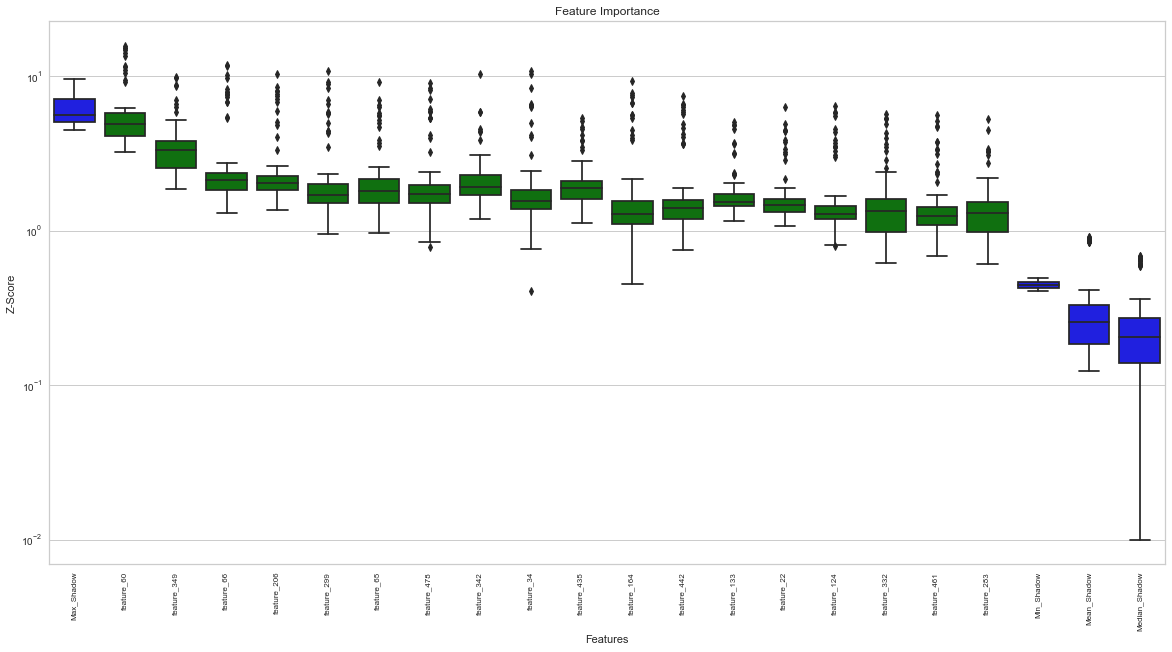

In [28]:
X_trainshap= BorutaShapFeatureSelection(retransformed_train,y_train)

In [29]:
X_trainshap

,feature_342,feature_349,feature_22,feature_283,feature_299,feature_65,feature_435,feature_164,feature_332,feature_133,feature_60,feature_34,feature_124,feature_206,feature_442,feature_478,feature_66,feature_461
0,2.6547,0.02370,-4750.75,0.0058,0.0595,19.3009,9.9805,0.128,0.0791,2.3766,0.6991,8.6915,15.83,9.22,0.9639,6.0266,23.2216,14.7554
1,2.0989,0.02720,-5410.75,0.0045,0.0662,21.4173,12.5349,0.157,0.1071,2.3805,-1.4173,8.3006,15.75,7.31,0.8427,4.8218,27.2716,12.1570
2,2.5012,0.01630,-6456.75,0.0064,0.0519,9.7645,12.8413,0.127,0.0852,2.3244,10.2355,8.7418,15.69,8.80,0.9193,6.1589,14.7061,21.1169
3,2.4329,0.03000,-5775.00,0.0088,0.0635,30.1482,10.5202,0.135,0.0985,2.3725,9.8518,8.6829,15.81,7.77,0.7158,5.0612,36.0791,41.7748
4,3.2653,0.02430,-6900.50,0.0035,0.0505,18.9664,11.1054,0.108,0.0817,2.3401,1.0336,8.5891,15.94,11.06,1.1255,7.4828,24.3057,23.1457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,1.8996,0.02640,-6451.75,0.0038,0.0449,16.7036,10.2005,0.103,0.1017,2.3323,3.2964,9.1156,15.98,6.83,0.8217,4.6390,21.2894,18.4257
1249,2.7085,0.01830,-5470.25,0.0038,0.0474,16.9655,7.7608,0.098,0.0850,2.2989,3.0345,8.4278,15.84,9.58,0.7558,6.6740,21.3048,31.6124
1250,3.1945,0.02680,-5972.75,0.0099,0.0721,28.5145,12.0903,0.154,0.0968,2.3646,11.4855,8.5155,15.97,9.74,0.9794,6.3958,36.4489,60.3473
1251,1.9995,0.02382,-5735.25,0.0072,0.0191,22.3109,3.4550,0.044,0.1104,2.2886,-2.3109,9.0650,15.73,6.56,0.8452,4.3482,29.5080,16.9711


<AxesSubplot:>

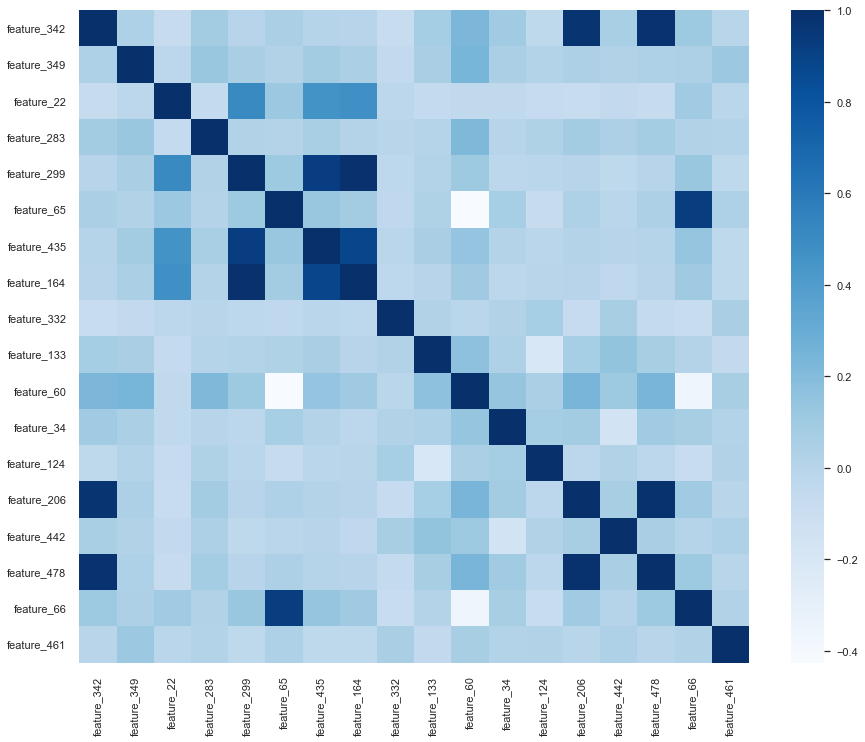

In [30]:
sns.set(rc = {'figure.figsize':(15,12)})

X_trainshap.corr()
sns.heatmap(X_trainshap.corr(),cmap="Blues")

In [31]:
modelshap = RandomForestClassifier(n_jobs=-1,n_estimators=100, max_depth=5, random_state=100)
modelshap.fit(retransformed_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=100)

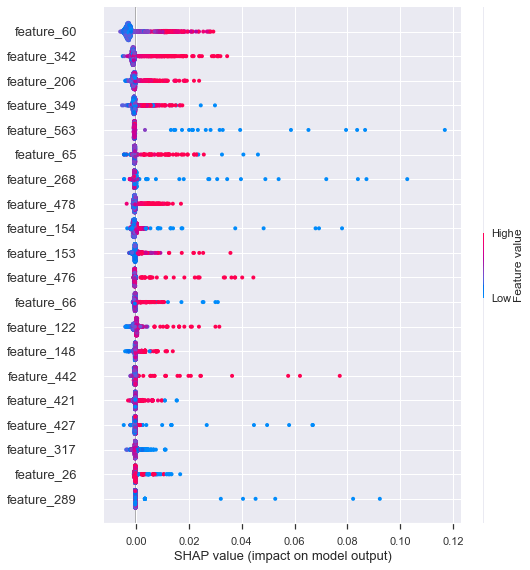

In [32]:
import shap # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(modelshap)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(retransformed_train)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], retransformed_train)

# Preparation of test data

In [33]:
x_test_1 = x_test.loc[:,x_train.columns]

In [60]:
x_test_1

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
1044,3031.22,2538.56,2211.5222,1079.7336,0.8126,100.0,105.1278,0.1190,1.4615,-0.0109,...,0.0060,67.6124,0.4998,0.0097,0.0028,1.9366,0.0257,0.0174,0.0060,67.6124
607,3032.07,2477.72,2172.4000,1148.4101,1.2614,100.0,102.4522,0.1227,1.4444,-0.0014,...,NaN,NaN,0.5027,0.0243,0.0047,4.8336,0.0199,0.0159,0.0048,79.7752
1332,3045.48,2408.85,2223.0444,1194.5986,1.2016,100.0,112.5811,0.1229,1.3838,-0.0125,...,NaN,NaN,0.4990,0.0137,0.0032,2.7392,0.0230,0.0210,0.0053,91.4264
1220,2973.99,2574.34,2226.4667,1591.2235,2.1717,100.0,90.3111,0.1219,1.4844,-0.0288,...,0.0032,54.1279,0.5030,0.0113,0.0035,2.2398,0.0207,0.0112,0.0032,54.1279
859,2919.71,2420.32,2134.7445,1244.2899,1.1827,100.0,99.5133,0.1249,1.3331,-0.0126,...,NaN,NaN,0.4938,0.0106,0.0028,2.1418,0.0220,0.0143,0.0045,65.2186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,2998.01,2479.77,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.3952,-0.0198,...,NaN,NaN,0.4958,0.0115,0.0031,2.3185,0.0280,0.0078,0.0022,27.7601
1545,3100.19,2490.60,2212.8445,1068.5644,1.7835,100.0,113.8833,0.1249,1.4294,-0.0014,...,0.0070,402.6874,0.4951,0.0165,0.0051,3.3383,0.0063,0.0252,0.0070,402.6874
54,2950.46,2398.44,2180.6778,1230.6762,1.4095,100.0,103.3778,0.1205,1.6486,-0.0239,...,0.0019,21.9917,0.4967,0.0152,0.0040,3.0587,0.0247,0.0054,0.0019,21.9917
1051,3012.45,2422.48,2208.5222,1838.7054,1.1571,100.0,95.2056,0.1249,1.4939,0.0096,...,NaN,NaN,0.4979,0.0120,0.0030,2.4101,0.0084,0.0097,0.0038,116.1088


In [74]:
x_test_2= x_test_1.loc[:,x_train_new.columns]

In [75]:
x_test_2

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
1044,3031.22,2538.56,2211.5222,1079.7336,0.8126,100.0,105.1278,0.1190,1.4615,-0.0109,...,0.0060,67.6124,0.4998,0.0097,0.0028,1.9366,0.0257,0.0174,0.0060,67.6124
607,3032.07,2477.72,2172.4000,1148.4101,1.2614,100.0,102.4522,0.1227,1.4444,-0.0014,...,NaN,NaN,0.5027,0.0243,0.0047,4.8336,0.0199,0.0159,0.0048,79.7752
1332,3045.48,2408.85,2223.0444,1194.5986,1.2016,100.0,112.5811,0.1229,1.3838,-0.0125,...,NaN,NaN,0.4990,0.0137,0.0032,2.7392,0.0230,0.0210,0.0053,91.4264
1220,2973.99,2574.34,2226.4667,1591.2235,2.1717,100.0,90.3111,0.1219,1.4844,-0.0288,...,0.0032,54.1279,0.5030,0.0113,0.0035,2.2398,0.0207,0.0112,0.0032,54.1279
859,2919.71,2420.32,2134.7445,1244.2899,1.1827,100.0,99.5133,0.1249,1.3331,-0.0126,...,NaN,NaN,0.4938,0.0106,0.0028,2.1418,0.0220,0.0143,0.0045,65.2186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,2998.01,2479.77,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.3952,-0.0198,...,NaN,NaN,0.4958,0.0115,0.0031,2.3185,0.0280,0.0078,0.0022,27.7601
1545,3100.19,2490.60,2212.8445,1068.5644,1.7835,100.0,113.8833,0.1249,1.4294,-0.0014,...,0.0070,402.6874,0.4951,0.0165,0.0051,3.3383,0.0063,0.0252,0.0070,402.6874
54,2950.46,2398.44,2180.6778,1230.6762,1.4095,100.0,103.3778,0.1205,1.6486,-0.0239,...,0.0019,21.9917,0.4967,0.0152,0.0040,3.0587,0.0247,0.0054,0.0019,21.9917
1051,3012.45,2422.48,2208.5222,1838.7054,1.1571,100.0,95.2056,0.1249,1.4939,0.0096,...,NaN,NaN,0.4979,0.0120,0.0030,2.4101,0.0084,0.0097,0.0038,116.1088


In [76]:
x_test= x_test_2.loc[:,x_train_new_2.columns]

In [77]:
zscore(x_test,x_test.columns,3)

In [82]:
x_test.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
count,313.000000,313.000000,310.000000,310.000000,310.000000,310.000000,311.000000,313.000000,313.000000,313.000000,...,120.000000,120.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,3015.668473,2493.883826,2201.779791,1389.420409,1.951267,101.326701,0.122121,1.457232,-0.000985,-0.000065,...,0.005451,99.209715,0.500038,0.014858,0.003766,2.971533,0.021061,0.016864,0.005372,101.461818
std,72.048492,83.078019,27.388107,411.533556,10.959894,6.216757,0.004163,0.073126,0.015327,0.009394,...,0.002759,81.813640,0.003295,0.004549,0.000930,0.909199,0.011477,0.008696,0.002723,90.563801
min,2797.719402,2238.092339,2118.633988,847.797600,0.721700,82.561126,0.084861,1.236283,-0.039300,-0.028498,...,0.001000,0.000000,0.491900,0.007300,0.001700,1.471600,-0.015155,0.003200,0.001000,0.000000
25%,2968.330000,2452.280000,2183.449975,1079.924825,1.020325,98.280575,0.121100,1.414500,-0.010800,-0.005800,...,0.003400,45.306775,0.498100,0.011625,0.003100,2.323425,0.014000,0.010400,0.003300,44.135650
50%,3011.840000,2492.810000,2201.350000,1287.884450,1.300100,101.587800,0.122400,1.457000,-0.001600,0.000500,...,0.004950,76.268450,0.500000,0.013950,0.003700,2.793300,0.019950,0.015000,0.004850,74.567850
75%,3057.560000,2535.710000,2218.427750,1586.947600,1.529600,104.854400,0.123950,1.505700,0.008900,0.006300,...,0.006525,117.079075,0.502000,0.017100,0.004100,3.436750,0.027500,0.021200,0.006750,116.108800
max,3233.891397,2749.222869,2285.113388,2788.577783,194.188563,120.109605,0.127600,1.648600,0.045054,0.028334,...,0.014508,355.944816,0.509100,0.030534,0.006790,6.107756,0.057571,0.044673,0.014229,403.089863


## imputation

### KNN Imputation

In [83]:
#no need to scale for test data
#x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test_3s), columns=x_test_3s.columns)
#x_test_scaled

In [85]:
imputed_test = pd.DataFrame(knn.transform(x_test), columns = x_test.columns)

In [86]:
imputed_test.isna().any().any()

False

In [87]:
imputed_test

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
0,3031.22,2538.56,2211.5222,1079.7336,0.8126,105.1278,0.1190,1.4615,-0.0109,0.0140,...,0.006000,67.612400,0.4998,0.0097,0.0028,1.9366,0.0257,0.0174,0.0060,67.6124
1,3032.07,2477.72,2172.4000,1148.4101,1.2614,102.4522,0.1227,1.4444,-0.0014,0.0001,...,0.385922,0.387956,0.5027,0.0243,0.0047,4.8336,0.0199,0.0159,0.0048,79.7752
2,3045.48,2408.85,2223.0444,1194.5986,1.2016,112.5811,0.1229,1.3838,-0.0125,0.0073,...,0.293503,0.324256,0.4990,0.0137,0.0032,2.7392,0.0230,0.0210,0.0053,91.4264
3,2973.99,2574.34,2226.4667,1591.2235,2.1717,90.3111,0.1219,1.4844,-0.0288,-0.0029,...,0.003200,54.127900,0.5030,0.0113,0.0035,2.2398,0.0207,0.0112,0.0032,54.1279
4,2919.71,2420.32,2134.7445,1244.2899,1.1827,99.5133,0.1249,1.3331,-0.0126,0.0076,...,0.242540,0.225742,0.4938,0.0106,0.0028,2.1418,0.0220,0.0143,0.0045,65.2186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2998.01,2479.77,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.3952,-0.0198,0.0026,...,0.352785,0.500535,0.4958,0.0115,0.0031,2.3185,0.0280,0.0078,0.0022,27.7601
310,3100.19,2490.60,2212.8445,1068.5644,1.7835,113.8833,0.1249,1.4294,-0.0014,0.0135,...,0.007000,355.944816,0.4951,0.0165,0.0051,3.3383,0.0063,0.0252,0.0070,402.6874
311,2950.46,2398.44,2180.6778,1230.6762,1.4095,103.3778,0.1205,1.6486,-0.0239,0.0031,...,0.001900,21.991700,0.4967,0.0152,0.0040,3.0587,0.0247,0.0054,0.0019,21.9917
312,3012.45,2422.48,2208.5222,1838.7054,1.1571,95.2056,0.1249,1.4939,0.0096,0.0071,...,0.448334,0.492187,0.4979,0.0120,0.0030,2.4101,0.0084,0.0097,0.0038,116.1088


## Unscaling of imputed test and filtering the features of test dataset

In [88]:
X_test = imputed_test.filter(X_trainshap.columns)

In [89]:
X_test

,feature_342,feature_349,feature_22,feature_283,feature_299,feature_65,feature_435,feature_164,feature_332,feature_133,feature_60,feature_34,feature_124,feature_206,feature_442,feature_478,feature_66,feature_461
0,3.4391,0.018700,-5287.50,0.0068,0.042900,21.2400,7.511000,0.09800,0.0686,2.4723,-1.2400,9.4336,15.67,9.94,1.1623,6.5927,28.1969,29.8359
1,4.7775,0.026900,-5613.50,0.0019,0.028000,24.1518,5.270300,0.06800,0.0868,2.3289,-4.1518,8.7219,15.94,17.13,0.7663,11.9817,30.4891,31.0326
2,2.7074,0.020800,-5489.75,0.0040,0.090000,25.1491,15.010700,0.19300,0.0321,2.2752,-5.1491,9.1637,15.89,9.20,0.5858,6.2464,33.1448,16.3653
3,1.7046,0.028300,-5100.00,0.0028,0.078600,25.6500,13.824200,0.18400,0.0832,2.2053,-5.6500,8.8097,16.08,5.49,0.9136,3.7154,31.1416,12.9610
4,2.4584,0.028800,-5416.50,0.0063,0.066400,16.3450,12.209000,0.15600,0.0979,2.2831,5.3973,8.2720,15.80,6.95,0.8834,4.6771,20.2491,25.5687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,1.7381,0.018400,-5012.75,0.0055,0.035100,21.4027,5.868900,0.07700,0.0699,2.2616,-1.4027,8.7635,15.86,5.51,0.7053,3.6998,28.4909,43.4743
310,2.0250,0.264522,-5338.75,0.0039,0.083500,15.3036,13.499200,0.17900,0.1002,2.2886,4.6964,8.1728,15.73,6.25,0.7584,4.1743,21.7822,33.6993
311,2.5763,0.021100,-4520.75,0.0104,0.235924,19.9545,74.202863,0.48084,0.0779,2.3179,20.0455,9.1784,15.92,9.60,0.7898,6.4725,26.3171,25.6289
312,2.0725,0.022900,-5336.75,0.0018,0.111000,22.1409,19.043900,0.24700,0.1014,2.4253,-2.1409,8.7402,15.77,6.62,0.7724,4.4298,27.9241,28.5461


In [90]:
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train_3s), columns=x_train_3s.columns)

# Balancing 

In [93]:
def Sampling(X_train, y_train, sampler):
    
    #SMOTE
    if sampler == 'SMOTE':
        sampler = SMOTE(random_state=100,sampling_strategy=1.0)    
    
    #ROSE
    if sampler == 'ROSE':
        sampler = RandomOverSampler(random_state=100, shrinkage=1,sampling_strategy=1.0)

    #ADASYN
    if sampler == 'ADASYN':
        sampler = ADASYN(random_state=100,sampling_strategy=1.0)
    

    #SMOTTEENN
    if sampler == 'SMOTEENN' :
        sampler = SMOTEENN(random_state=100)
        
        
    #Random under Sampling
    if sampler == "randomunder":
        sampler = RandomUnderSampler(random_state=100,sampling_strategy=1.0)

    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    counter = Counter(y_resampled)
    print(counter)
    return X_resampled, y_resampled

In [94]:
X_resampled, y_resampled = Sampling(X_trainshap, y_train,'SMOTEENN')

Counter({1: 1018, -1: 755})


In [95]:
y_test.value_counts(normalize=True)*100

-1    93.312102
 1     6.687898
Name: status, dtype: float64

In [96]:
y_resampled.value_counts(normalize=True)*100

 1    57.416808
-1    42.583192
Name: status, dtype: float64

# Building Model

Grid Search and cross validation for Random Forest

In [97]:
# Create the random grid
rf_params = {'n_estimators': [25, 50],
               'criterion' : ['entropy', 'gini'],
               'max_features': ['sqrt', 'auto'],
               'max_depth': [3,5,7,10],
               'min_samples_split': [75,100],
               'min_samples_leaf': [1, 10],
               'max_samples' : [110, 200]
              }

In [98]:
# Create a base model to tune
rf = RandomForestClassifier(random_state=100)

# Grid Search
rf_random = GridSearchCV(estimator = rf, param_grid = rf_params, scoring='recall', cv = 5, verbose=1)

# Fit the random search model
rf_random.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['sqrt', 'auto'],
                         'max_samples': [110, 200], 'min_samples_leaf': [1, 10],
                         'min_samples_split': [75, 100],
                         'n_estimators': [25, 50]},
             scoring='recall', verbose=1)

In [99]:
# Printing the best Parameters and best estimator

#Printing the best estimator

print('\n Best estimator:')
print(rf_random.best_estimator_)

print('\n Best hyperparameters:')
print(rf_random.best_params_)


 Best estimator:
RandomForestClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       max_samples=110, min_samples_split=100, n_estimators=25,
                       random_state=100)

 Best hyperparameters:
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'max_samples': 110, 'min_samples_leaf': 1, 'min_samples_split': 100, 'n_estimators': 25}


In [100]:
# Evaluation using Startified K Fold cross validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(rf_random.best_estimator_, X_resampled, y_resampled, cv=cv, scoring = 'recall')
print(scores.mean())
# fit
rf=rf_random.best_estimator_.fit(X_resampled, y_resampled)    
# predict
y_pred_test = rf_random.best_estimator_.predict(X_test)
# View accuracy score
accuracyFinal = accuracy_score(y_test, y_pred_test)
print('Test Accuracy : ', accuracyFinal)

0.9538394668212111
Test Accuracy :  0.445859872611465


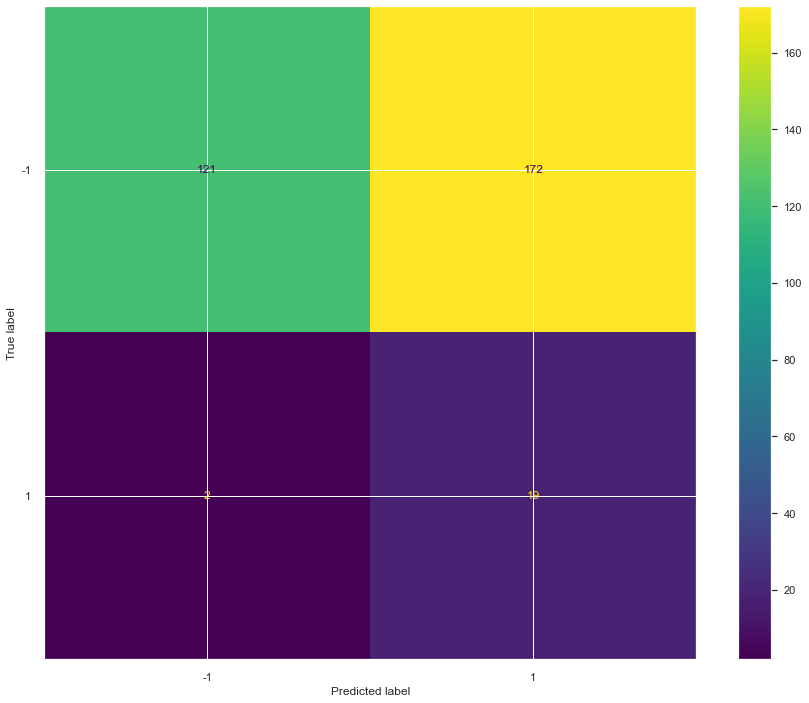

              precision    recall  f1-score   support

          -1       0.98      0.41      0.58       293
           1       0.10      0.90      0.18        21

    accuracy                           0.45       314
   macro avg       0.54      0.66      0.38       314
weighted avg       0.92      0.45      0.55       314



In [101]:
# Plot confussion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=rf_random.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_random.best_estimator_.classes_)
disp.plot()
plt.show()
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test)) 

In [102]:
from sklearn.metrics import f1_score

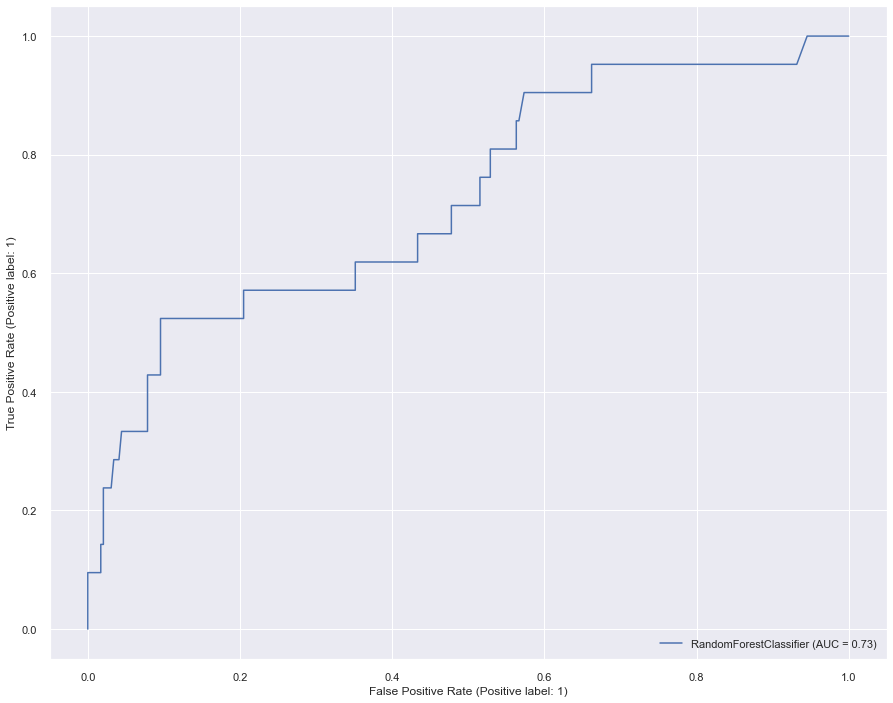

In [103]:
# ROC curve
metrics.RocCurveDisplay.from_estimator(rf_random.best_estimator_, X_test, y_test)
plt.show()

Grid Search and Cross Validation for SVM

In [104]:
from sklearn.svm import SVC

In [105]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
 
# fitting the model for grid search
grid.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)


In [ ]:
# Evaluation using Startified K Fold cross validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(grid.best_estimator_, X_resampled, y_resampled, cv=cv, scoring = 'roc_auc')
print(scores.mean())
# fit
svc=grid.best_estimator_.fit(X_resampled, y_resampled)    
# predict
y_pred_test = grid.best_estimator_.predict(X_test)
# View accuracy score
accuracyFinal = accuracy_score(y_test, y_pred_test)
print('Test Accuracy : ', accuracyFinal)

0.9949034512183499
Test Accuracy :  0.7611464968152867


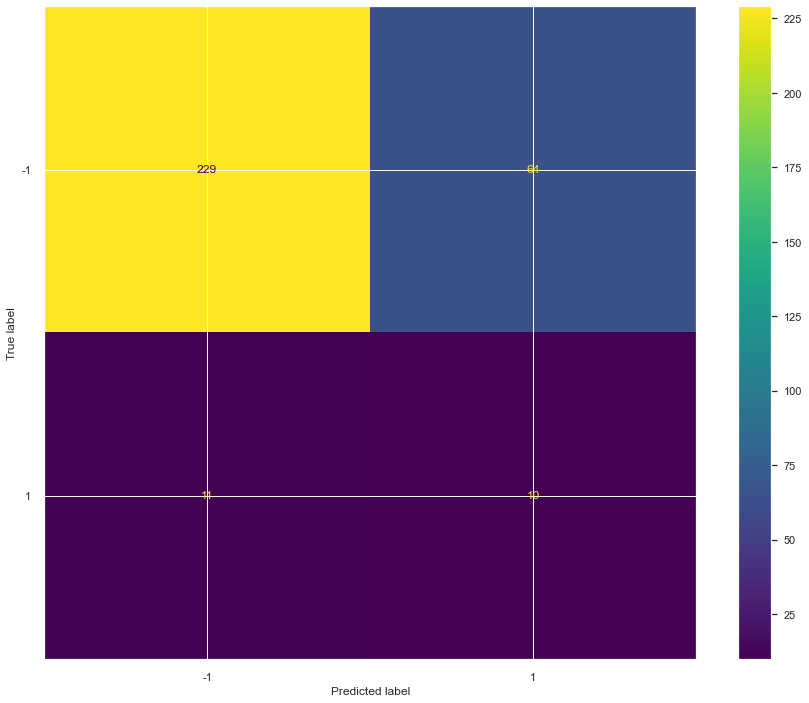

              precision    recall  f1-score   support

          -1       0.95      0.78      0.86       293
           1       0.14      0.48      0.21        21

    accuracy                           0.76       314
   macro avg       0.54      0.63      0.53       314
weighted avg       0.90      0.76      0.82       314



In [ ]:
# Plot confussion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=grid.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid.best_estimator_.classes_)
disp.plot()
plt.show()
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test)) 

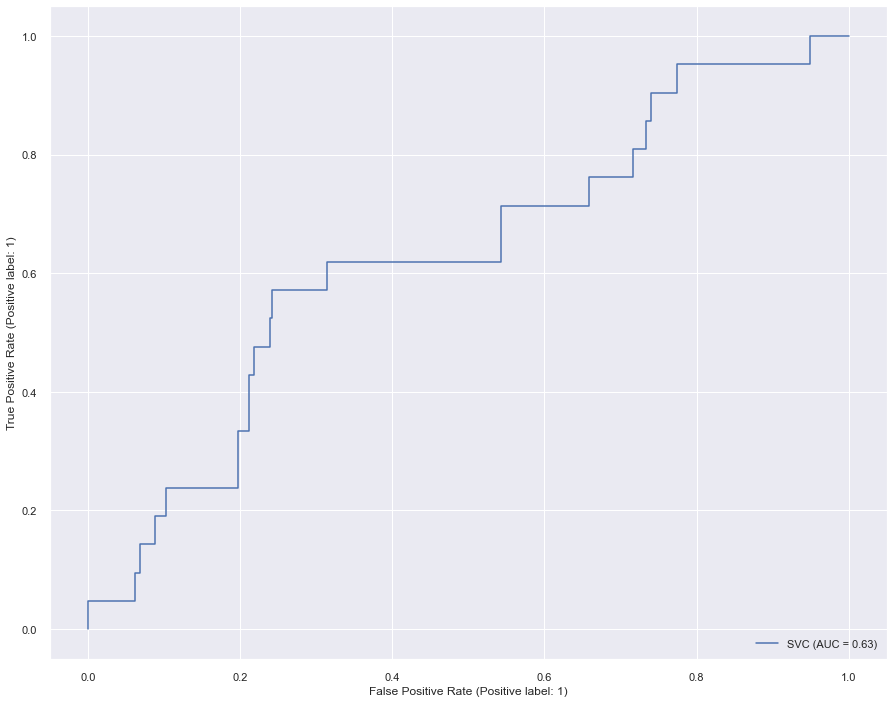

In [ ]:
# ROC curve
metrics.RocCurveDisplay.from_estimator(grid.best_estimator_, X_test, y_test)
plt.show()

Grid Search and Cross Validation for Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# defining parameter range
param_grad = {'learning_rate': [0.15, 1, 0.02, 0.03, 0.05],
              'n_estimators': [100, 150,200, 250, 500, 1000],
              'max_depth': [4,6,8],
              'subsample': [0.9, 0.5,0.2]
              }
 
grid_grad = GridSearchCV(GradientBoostingClassifier(), param_grad, refit = True, verbose = 1,n_jobs=-1)
 
# fitting the model for grid search
grid_grad.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.15, 1, 0.02, 0.03, 0.05],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 150, 200, 250, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2]},
             verbose=1)

In [ ]:

# print best parameter after tuning
print(grid_grad.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid_grad.best_estimator_)

{'learning_rate': 0.15, 'max_depth': 8, 'n_estimators': 250, 'subsample': 0.9}
GradientBoostingClassifier(learning_rate=0.15, max_depth=8, n_estimators=250,
                           subsample=0.9)


In [ ]:
# Evaluation using Startified K Fold cross validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(grid_grad.best_estimator_, X_resampled, y_resampled, cv=cv, scoring = 'roc_auc')
print(scores.mean())
# fit
grad=grid_grad.best_estimator_.fit(X_resampled, y_resampled)    
# predict
y_pred_test = grid_grad.best_estimator_.predict(X_test)
# View accuracy score
accuracyFinal = accuracy_score(y_test, y_pred_test)
print('Test Accuracy : ', accuracyFinal)

0.9965296234958929
Test Accuracy :  0.89171974522293


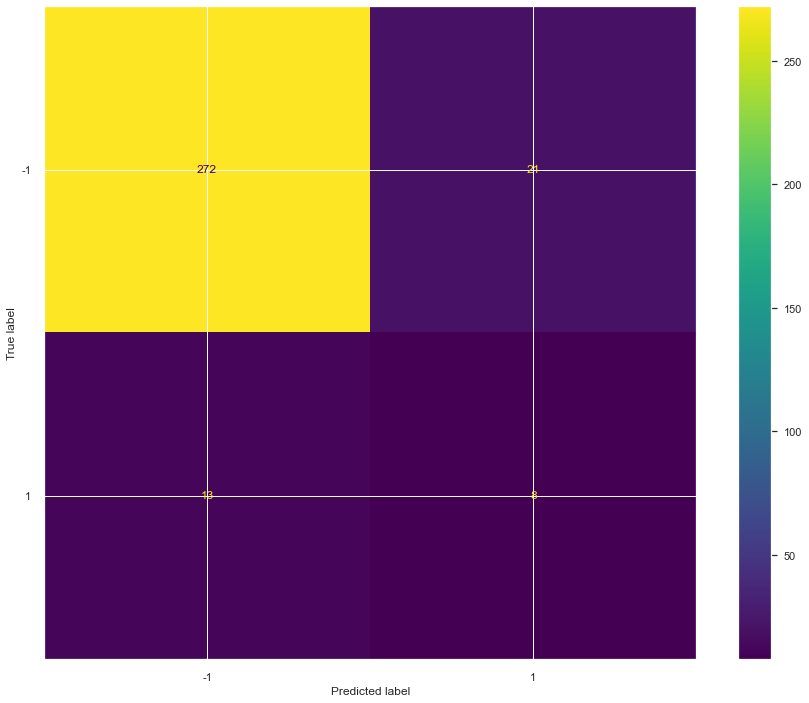

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94       293
           1       0.28      0.38      0.32        21

    accuracy                           0.89       314
   macro avg       0.62      0.65      0.63       314
weighted avg       0.91      0.89      0.90       314



In [ ]:
# Plot confussion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=grid_grad.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_grad.best_estimator_.classes_)
disp.plot()
plt.show()
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test)) 

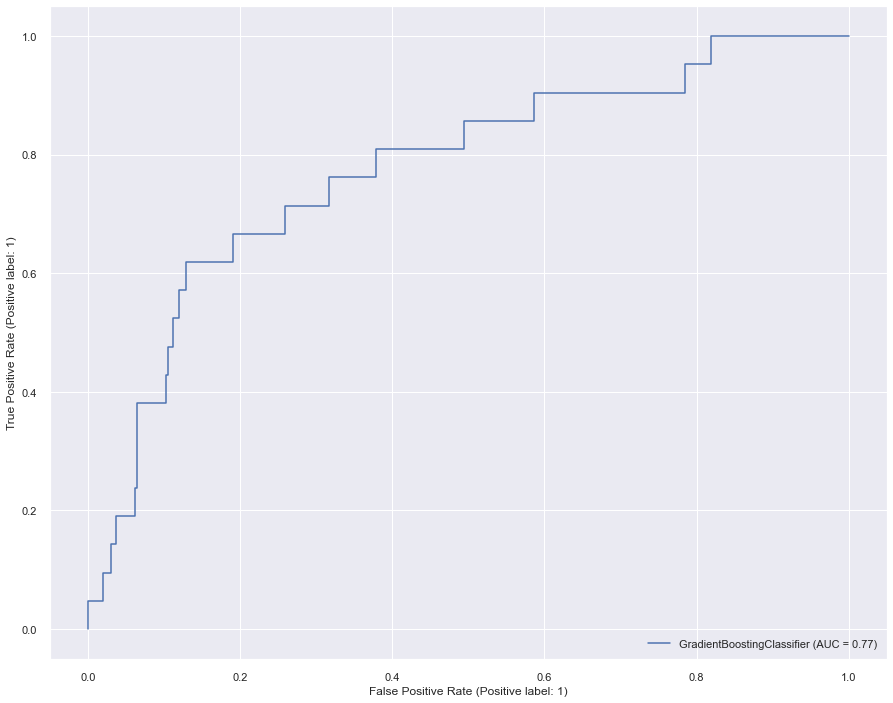

In [ ]:
# ROC curve
metrics.RocCurveDisplay.from_estimator(grid_grad.best_estimator_, X_test, y_test)
plt.show()

Ensembled/Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
vc=VotingClassifier([('clf1',rf),('clf2',svc),('clf3',grad)])
cross_val_score(vc,X_resampled,y_resampled).mean()

0.9734956632450068

In [ ]:
param={'voting' :['hard','soft'],
        'weights' :  [(1,1,1),(2,1,1),(1,2,1),(1,1,2)]}

In [ ]:
#find best set of parameters
grid_voting= GridSearchCV(vc,param)
grid_voting.fit(X_resampled,y_resampled)
grid_voting.best_params_

{'voting': 'hard', 'weights': (1, 2, 1)}

In [ ]:
#what accuracy is now?
grid_voting.best_score_

0.9870279302936262

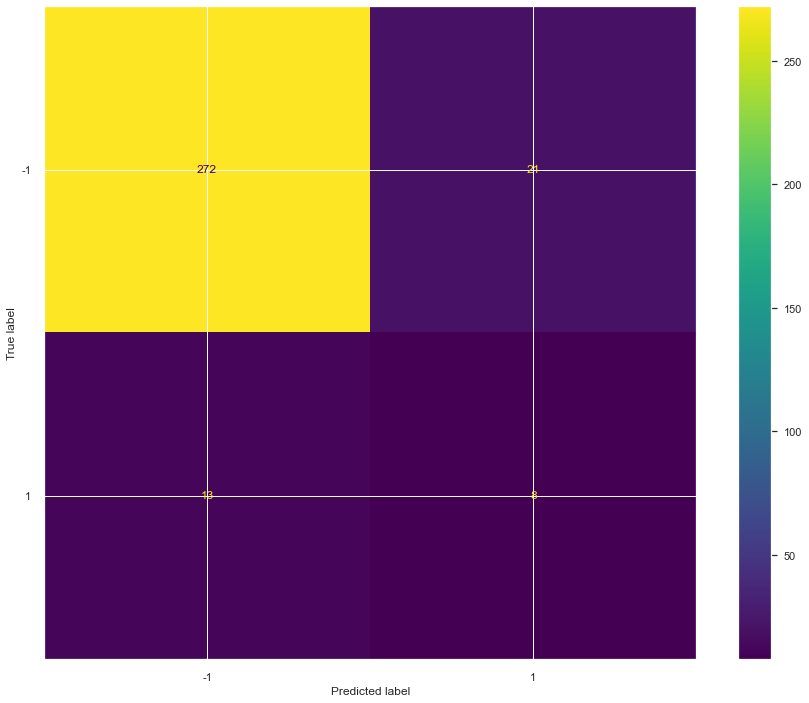

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94       293
           1       0.28      0.38      0.32        21

    accuracy                           0.89       314
   macro avg       0.62      0.65      0.63       314
weighted avg       0.91      0.89      0.90       314



In [ ]:
# Plot confussion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=grid_voting.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_voting.best_estimator_.classes_)
disp.plot()
plt.show()
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test)) 

Adaboost Implementation

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
adb= AdaBoostClassifier(RandomForestClassifier(),n_estimators=10, learning_rate=1)
# Fit the random search model
adb.fit(X_resampled, y_resampled)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=1,
                   n_estimators=10)

In [ ]:
# Evaluation using Startified K Fold cross validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(adb, X_resampled, y_resampled, cv=cv, scoring = 'recall')
print(scores.mean())
# fit
adbb=adb.fit(X_resampled, y_resampled)    
# predict
y_pred_test = adb.predict(X_test)
# View accuracy score
accuracyFinal = accuracy_score(y_test, y_pred_test)
print('Test Accuracy : ', accuracyFinal)

0.983318844779291
Test Accuracy :  0.8821656050955414


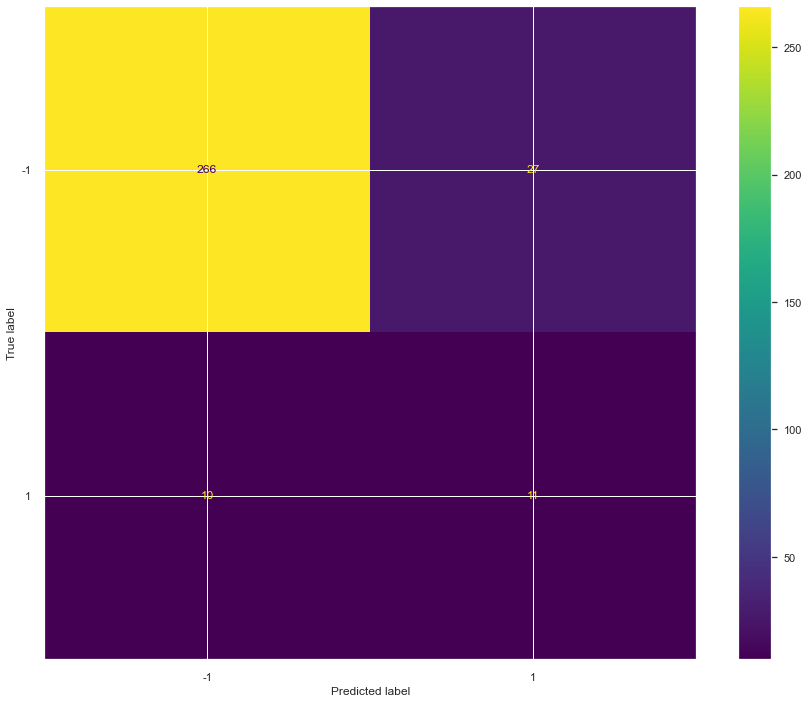

              precision    recall  f1-score   support

          -1       0.96      0.91      0.93       293
           1       0.29      0.52      0.37        21

    accuracy                           0.88       314
   macro avg       0.63      0.72      0.65       314
weighted avg       0.92      0.88      0.90       314



In [ ]:
# Plot confussion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=adb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=adb.classes_)
disp.plot()
plt.show()
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test)) 

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, roc_auc_score, log_loss, cohen_kappa_score

SyntaxError: EOL while scanning string literal (Temp/ipykernel_21048/519511564.py, line 1)

Voting classifier results

In [ ]:
def run_model(X_train, y_train, X_test, y_test):

    grid_voting= GridSearchCV(vc,param)
    model=grid_voting.fit(X_resampled,y_resampled)

    #For TEST SPLIT
    y_pred= model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    accuracy= accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred) ##
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = cf_matrix[1][1] / ( cf_matrix[1][1] + cf_matrix[1][0] )
    auc = roc_auc_score(y_test, y_pred)
    type_1_error_FP = cf_matrix[0][1]
    type_2_error_FN = cf_matrix[1][0]
    log_loss_ = log_loss(y_test, y_pred)
    cohen_kappa_score_ = cohen_kappa_score(y_test, y_pred)
    #Note by default 1 is the positive label. Therefore, -1 is negative
    #bad waffe -> 2 line of matrix -> POSITIVE -> data = -1

    #For TRAIN SPLIT
    y_pred_train= model.predict(X_train)
    cf_matrix_train = confusion_matrix(y_train, y_pred_train)
    accuracy_train= accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train) ##
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    specificity_train = cf_matrix_train[1][1] / ( cf_matrix_train[1][1] + cf_matrix_train[1][0] )
    auc_train = roc_auc_score(y_train, y_pred_train)
    type_1_error_FP_train = cf_matrix_train[0][1]
    type_2_error_FN_train = cf_matrix_train[1][0]




    return cf_matrix, accuracy, f1, precision, recall, specificity, type_1_error_FP, type_2_error_FN, auc,log_loss_,cohen_kappa_score_, cf_matrix_train, accuracy_train, f1_train, precision_train, recall_train, specificity_train, type_1_error_FP_train, type_2_error_FN_train, auc_train

#run_model(X_train, y_train, X_test, y_test)

In [ ]:
run_model(X_resampled, y_resampled, X_test, y_test)

(array([[270,  23],
        [ 13,   8]], dtype=int64),
 0.8853503184713376,
 0.30769230769230765,
 0.25806451612903225,
 0.38095238095238093,
 0.38095238095238093,
 23,
 13,
 0.6512270437185113,
 3.9599182833047113,
 0.24770397976840142,
 array([[ 754,    1],
        [   0, 1018]], dtype=int64),
 0.9994359842075579,
 0.9995090819833087,
 0.9990186457311089,
 1.0,
 1.0,
 1,
 0,
 0.9993377483443708)

gradientboosting results

In [ ]:
def run_model(X_train, y_train, X_test, y_test):

    model=grid_grad.best_estimator_.fit(X_resampled, y_resampled)  

    #For TEST SPLIT
    y_pred= model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    accuracy= accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred) ##
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = cf_matrix[1][1] / ( cf_matrix[1][1] + cf_matrix[1][0] )
    auc = roc_auc_score(y_test, y_pred)
    type_1_error_FP = cf_matrix[0][1]
    type_2_error_FN = cf_matrix[1][0]
    log_loss_ = log_loss(y_test, y_pred)
    cohen_kappa_score_ = cohen_kappa_score(y_test, y_pred)
    #Note by default 1 is the positive label. Therefore, -1 is negative
    #bad waffe -> 2 line of matrix -> POSITIVE -> data = -1

    #For TRAIN SPLIT
    y_pred_train= model.predict(X_train)
    cf_matrix_train = confusion_matrix(y_train, y_pred_train)
    accuracy_train= accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train) ##
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    specificity_train = cf_matrix_train[1][1] / ( cf_matrix_train[1][1] + cf_matrix_train[1][0] )
    auc_train = roc_auc_score(y_train, y_pred_train)
    type_1_error_FP_train = cf_matrix_train[0][1]
    type_2_error_FN_train = cf_matrix_train[1][0]




    return cf_matrix, accuracy, f1, precision, recall, specificity, type_1_error_FP, type_2_error_FN, auc,log_loss_,cohen_kappa_score_, cf_matrix_train, accuracy_train, f1_train, precision_train, recall_train, specificity_train, type_1_error_FP_train, type_2_error_FN_train, auc_train

#run_model(X_train, y_train, X_test, y_test)

In [ ]:
run_model(X_resampled, y_resampled, X_test, y_test)

(array([[272,  21],
        [ 13,   8]], dtype=int64),
 0.89171974522293,
 0.32,
 0.27586206896551724,
 0.38095238095238093,
 0.38095238095238093,
 21,
 13,
 0.6546400130017878,
 3.7399209839904377,
 0.2628090042811767,
 array([[ 755,    0],
        [   0, 1018]], dtype=int64),
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0,
 0,
 1.0)